## Clasificação

- Projeto de classificação com a base de dados MINIST.
- É uma base de dados de dígitos escritos manualmente, contendo dígitos de 0 a 9.
- As imagens do dataset são padronizadas para caber em uma matriz 28×28 pixels, cada dígito possui 784 atributos, onde cada pixel representa um nível de escala de cinza, variando de 0 (branco) 255 (preto).

### Setup

Primeiro, vamos importar alguns módulos comuns, garantir que o MatplotLib plote as figuras inline e preparar uma função para salvar as figuras. Também verificamos se o Python 3.5 ou posterior está instalado, bem como o Scikit-Learn ≥0,20.

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Importando a base de dados diretamente do Scikit-Learn

In [1]:
# Este import foi inserido para corrir um erro durante o download do dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

C:\Users\pedro\AppData\Roaming\Python\Python38\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [26]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

#### Mostrando um caractere

Saving figure some_digit_plot


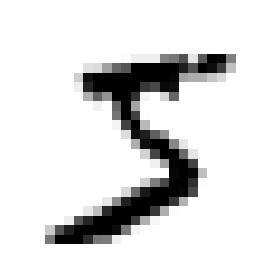

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [12]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

#### Separando as bases de treino e teste

- Esta base de dados já está separada, precisamos colocar os indices

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [39]:
# Convertendo os labels de string para inteiro
y_train = y_train.astype(int)
y_test = y_test.astype(int)

#### Dicas

- Alguns algoritmos são mais sensíveis à ordem das instâncias de treinamento, e podem performar mal caso ocorra muitas intâncias semelhantes. Embaralhando a ordem dos datasets garante que isso não aconteça.
- O embaralhamento pode ser uma má ideia com séries temporais.

### Treinando um classificador Binário

- Para simplificar o problema será considerado apenas um dígito, o 5.

#### Selecinando os dados correspondentes ao dígito 5

In [40]:
y_train_5 = (y_train == 5) # True para todos os 5's, False para todos os outros
y_test_5 = (y_test == 5)

In [41]:
# verificando os valores que estao presentes
np.unique(y_train_5),np.unique(y_test_5)

(array([False,  True]), array([False,  True]))

#### Selecionando o classificador

- Vamos utilizar o Stochastic Gradiente Descent (SGD), ele tem como vantagem lidar com datasets grandes com eficiência, devido considerar as instâncias de treinando independentes, uma por vez, o que favore ele também ser utilizando para aprendizado 'online'. 

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [43]:
# Verificando se classifica como 5
sgd_clf.predict([some_digit])

array([ True])

- O algoritmo classificou corretamente esse exemplo

### Avaliando a performance

#### Medindo a acurácia com Validação Cruzada

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#### Implementando Validaçao Cruzada

- Vamos implementar nosso próprio código de validação cruzada para termos mais controle do processo.
- Vamos investigar um pouco mais a fundo esse resultados!!!

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Parâmetro shuffle igual a True
# A classe StratifiedKFold separa cada parte mantendo a proporção de cada classe
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [49]:
print("Média: ",(0.9669+0.91625+0.96785)/3)

Média:  0.9503333333333334


- Média de acima de 95%!!!! Incrível!!
- Vamos verificar como classificador classificou cada imagem.

#### Verificando a proporção de cada classe

In [52]:
from collections import Counter

In [55]:
counts = Counter(y_test_fold)

for value, count in counts.items():
    print(f"O valor {value} aparece {count} vezes")

O valor False aparece 18193 vezes
O valor True aparece 1807 vezes


In [65]:
print(f"Proporcao de valores True: {(1807/18193)*100}%")

Proporcao de valores True: 9.932391579178805%


- A proporção de valores True é de aproximadamente 10% e 90% como False, se o algoritmo palpitar todos os resultados como False, o desempenho dele será de 90%.
- A métrica de acurácia neste caso não faz muito sentido, é uma base de dados desbalanceada (ou skewed datasets)

#### Classificador 'Never5'

- Vamos verificar o desempenho de um classificar que classifica tudo como False, ou seja, nunca classe 5.

In [66]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [67]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

- Esse classifiacdor atingiu o resultado que comentamos anteriormente

#### Notas

- A acurácia geralmente não é indicada para medir a performance para classificadores, principalmente com bases desbalanceadas.

### Matriz de Confusão

- Um forma melhor de avaliar a performance é com a matriz de confusão

- A função cross_val_predict executa o K-FOLD cross-validation, porém ao invés de retornar a pontuação da classificação, ele retorna as predições realizadas em cada teste.

In [68]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

#### Dúvida

- No caso de amostras criadas com reposição, como construir a matrix de confusão?

#### Precisão

$ precision = \frac{TP}{TP + FP} $

- A precisão é usada juntamente com outra métrica chamada Recall, Sensitivity ou True Positive Rate (TPR)

#### Recall

$ recall = \frac{TP}{TP + FN}$

#### Aplicando Precision e Recall nos nossos resultados

In [71]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [72]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

- Quando é apresentando um 5 para o classificador ele classifica corretamente 83% das vezes.

In [75]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [74]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

- O Classificador detectou corretamente 65% das instâncias

#### F1-Score

- É a média harmônica (https://pt.wikipedia.org/wiki/M%C3%A9dia_harm%C3%B4nica) da precisão e recall, assim simetricamente é possível representar as duas métricas com um único valor.
- A vantagem é de que a média regular trata todos os valores igualmente, a médica harmônica atribui um peso maior para valores menores. Desta forma, o classificador terá uma F1 alta apenas se ambas métricas forem altas.

#### Computando o F1-Score

In [76]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [77]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

#### Notas

- O F1-favorece classificadores que possuem precision e recall semelhantes, porém há situações que é necessário se preocupar mais com a precisão ou com o recall, então nem sempre o F1-score indicado.
- Não é possível priorizar, recall ou precision, se aumentar a precisão, diminui o recall e vice-versa. Isso é chamado Precision/Recall Trade-off.

### Precision/Recall Trade-off

- Vamos demonstrar que priorizando uma das duas métricas, precision ou recall,  a outra diminui e assim o F1 é prejudicado.
- Vamos utilizar o Stochastic Gradiente Descent (SGD) para demonstrar.
- Este algorito, para cada instância ele computa um escore baseado numa função de decisão, se o escore for maior que um limiar (threshold), ele atribui positivo, caso contrário, negativo.
- Para este algoritmo o limiar é 0.

#### Verificando o limiar de uma instância

In [78]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

#### Comparando se é maior que o limiar

In [79]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([ True])

- O resultado de que o escore é maior que 0

#### Aumentando o valor do limiar

In [80]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

- O resultado apontou que agora a predição foi incorreta, ou seja, deixei de computar uma instância como TP e computei uma instância como FN, ou seja, diminui o valor do recall.

#### Como decidir qual limiar usar?

- Como decidir qual limiar usar?
- Primeiro usar o cross_val_predict() para obter os escores de todas as instâncias na base de treinamento, passando o parâmetro para indicar que deseja receber os escores de decisão ao invés das predições.

In [81]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

- Depois aplica a função precision_recall_curve() para computar precisão e recall das instâncias

In [82]:
from sklearn.metrics import precision_recall_curve

# retorna a precisão, recall e threshold de cada instância
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

- Depois plota a precisão e recall em função dos threshold

Saving figure precision_recall_vs_threshold_plot


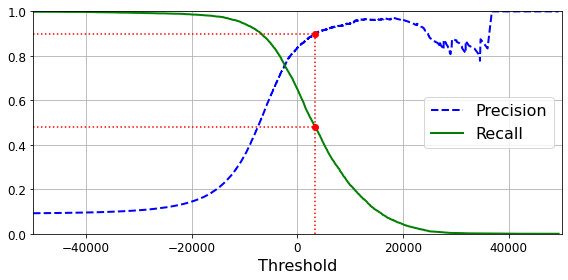

In [84]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown


# Definindo a precisao de 90%
recall_90_precision = recalls[np.argmax(precisions >= 0.90)] 
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # Threshold de aproximadamente 3370


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

- Essa imagem mostra o comportamento de cada uma das métricas.
- Se desejar priorizar uma das métricas, esse gráfico ajuda a decidir.
- Neste exemplo, está considerando 90% de precisão, o recall de 0.4799852425751706 e threshold de 3370

In [96]:
print("Valor do recall para precisao 90%: ",recall_90_precision)

Valor do recall para precisao 90%:  0.4799852425751706


In [95]:
print("Valor do threshold_90_precision para precisao 90%: ",threshold_90_precision)

Valor do threshold_90_precision para precisao 90%:  3370.0194991439557


#### Notas

- Dessa forma é possível ter um classificar com a precisão virtual desejada.
- Cuidado para não selecionar uma precisão com um recall muito baixo, não será muito útil.

#### Gráfico comparativo Precision x Recall

Saving figure precision_vs_recall_plot


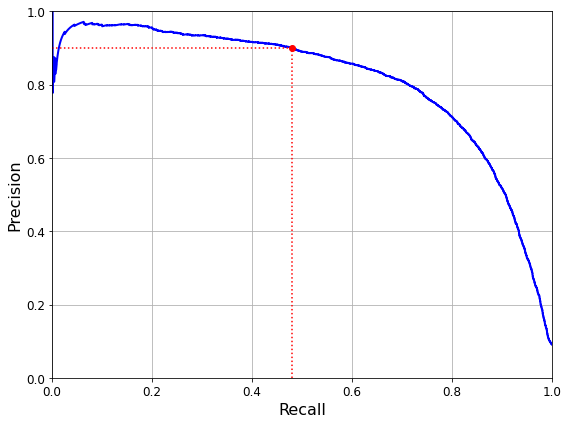

In [97]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

- A partir do recall 0.6 a precisão despenca rapidamente!
- É melhor selecionar em um ponto antes da queda!